<a href="https://colab.research.google.com/github/coolkite/machine_translation/blob/main/Eng_to_Fre_Translation_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://www.manythings.org/anki/fra-eng.zip

--2023-03-27 17:55:52--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7155035 (6.8M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   6.82M  30.4MB/s    in 0.2s    

2023-03-27 17:55:53 (30.4 MB/s) - ‘fra-eng.zip’ saved [7155035/7155035]



In [ ]:
!wget https://github.com/lukysummer/Machine-Translation-Seq2Seq-Keras/blob/master/data/small_vocab_en
!wget https://github.com/lukysummer/Machine-Translation-Seq2Seq-Keras/blob/master/data/small_vocab_fr

--2023-03-27 18:46:29--  https://github.com/lukysummer/Machine-Translation-Seq2Seq-Keras/blob/master/data/small_vocab_en
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘small_vocab_en’

small_vocab_en          [ <=>                ] 137.26K  --.-KB/s    in 0.07s   

2023-03-27 18:46:30 (1.82 MB/s) - ‘small_vocab_en’ saved [140555]

--2023-03-27 18:46:30--  https://github.com/lukysummer/Machine-Translation-Seq2Seq-Keras/blob/master/data/small_vocab_fr
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘small_vocab_fr’

small_vocab_fr          [ <=>                ] 137.26K  --.-KB/s    in 0.07s   

2023-03-27 18:46:30 (1.80 MB/s) - ‘small_vocab_fr’ saved [140555]



In [ ]:
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip

--2023-03-27 16:43:32--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 35.173.225.216, 34.203.133.210, 52.2.178.255, ...
Connecting to huggingface.co (huggingface.co)|35.173.225.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27glove.6B.zip%3B+filename%3D%22glove.6B.zip%22%3B&response-content-type=application%2Fzip&Expires=1680194613&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3N0YW5mb3JkbmxwL2dsb3ZlLzY0NzEzODJjZGQ4Mzc1NDRiZjNhYzcyNDk3YTM4NzE1ZTg0NTg5N2QyNjViMmI0MjRiNDc2MTgzMjAwOWM4Mzc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjgwMTk0NjEzfX19XX0_&Signature=h0Z84Gz9yazrpIaE83GZ%

In [ ]:
!unzip "/content/fra-eng.zip"

Archive:  /content/fra-eng.zip
replace _about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: _about.txt              
  inflating: fra.txt                 


In [ ]:
!unzip "/content/glove.6B.zip"

Archive:  /content/glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing import *
from keras.models import Model
from keras.layers import *
from keras.utils import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.149.10:8470


REPLICAS:  8


In [ ]:
# df = pd.read_csv("/content/spa.txt", sep='\t')

# encoder_train = df.iloc[:,0].to_numpy()
# decoder_train = df.iloc[:,1].to_numpy()
# print(encoder_train.shape, decoder_train.shape)
# print(encoder_train[11])
# print(decoder_train[11])

(139635,) (139635,)
Who?
¿Quién?


In [ ]:
with open('/content/small_vocab_en', 'r') as f:
    encoder_train = f.read().split('\n')
    
with open('/content/small_vocab_fr', 'r') as f:
    decoder_train = f.read().split('\n')

In [ ]:
for sample_i in range(2):
    print('English Sentence {} :  {}'.format(sample_i+1, encoder_train[sample_i]))
    print('French Sentence {}  :  {}\n'.format(sample_i+1, decoder_train[sample_i]))

English Sentence 1 :  new jersey is sometimes quiet during autumn , and it is snowy in april .
French Sentence 1  :  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .

English Sentence 2 :  the united states is usually chilly during july , and it is usually freezing in november .
French Sentence 2  :  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .



In [ ]:
def tokenize(dataset):
  dataset = ["<BOS> " + train + " <EOS>" for train in dataset]
  token = text.Tokenizer(num_words = None)
  token.fit_on_texts(dataset)
  dataset = token.texts_to_sequences(dataset)
  return dataset, token.word_index

def padding(dataset):
  max_length = max([len(text) for text in dataset])
  dataset = pad_sequences(dataset, maxlen=max_length, padding = 'post', truncating = 'post')
  return max_length, dataset

In [ ]:
import pickle

encoder_train, enc_dict = tokenize(encoder_train)
decoder_train, dec_dict = tokenize(decoder_train)
print(encoder_train[11])

max_enc_seq_length, enc_train_pad = padding(encoder_train)
max_dec_seq_length, dec_train_pad = padding(decoder_train)
print(enc_train_pad[11])
print(max_enc_seq_length)
print(dec_train_pad[11])
print(max_dec_seq_length)

print(enc_dict)

with open('engTokenizer.pickle', 'wb') as handle:
    pickle.dump(enc_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('freTokenizer.pickle', 'wb') as handle:
    pickle.dump(dec_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

print()

[2, 28, 129, 102, 113, 114, 103, 3]
[  2  28 129 102 113 114 103   3   0   0   0   0   0   0   0   0   0]
17
[  2   5 120 151 146 185 112 135   3   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
23
{'is': 1, 'bos': 2, 'eos': 3, 'in': 4, 'it': 5, 'during': 6, 'the': 7, 'but': 8, 'and': 9, 'sometimes': 10, 'usually': 11, 'never': 12, 'favorite': 13, 'least': 14, 'fruit': 15, 'most': 16, 'loved': 17, 'liked': 18, 'new': 19, 'paris': 20, 'india': 21, 'united': 22, 'states': 23, 'california': 24, 'jersey': 25, 'france': 26, 'china': 27, 'he': 28, 'she': 29, 'grapefruit': 30, 'your': 31, 'my': 32, 'his': 33, 'her': 34, 'fall': 35, 'june': 36, 'spring': 37, 'january': 38, 'winter': 39, 'march': 40, 'autumn': 41, 'may': 42, 'nice': 43, 'september': 44, 'july': 45, 'april': 46, 'november': 47, 'summer': 48, 'december': 49, 'february': 50, 'our': 51, 'their': 52, 'freezing': 53, 'pleasant': 54, 'beautiful': 55, 'october': 56, 'snowy': 57, 'warm': 58, 'cold': 59, 'wonderful': 60, 'dry': 

In [ ]:
embeddings_index = {}
f = open('/content/glove.6B.300d.txt')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

400001it [00:32, 12293.75it/s]


In [ ]:
def Glove(latentDim, dictionary):
  embedding_matrix = np.zeros((len(dictionary) + 1, latentDim))
  for word, i in tqdm(dictionary.items()):
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector
  
  return embedding_matrix


100%|██████████| 346/346 [00:00<00:00, 130143.41it/s]


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 17)]         0           []                               
                                                                                                  
 input_36 (InputLayer)          [(None, 23)]         0           []                               
                                                                                                  
 embedding_34 (Embedding)       (None, 17, 300)      60600       ['input_35[0][0]']               
                                                                                                  
 embedding_35 (Embedding)       (None, 23, 300)      104100      ['input_36[0][0]']               
                                                                                           

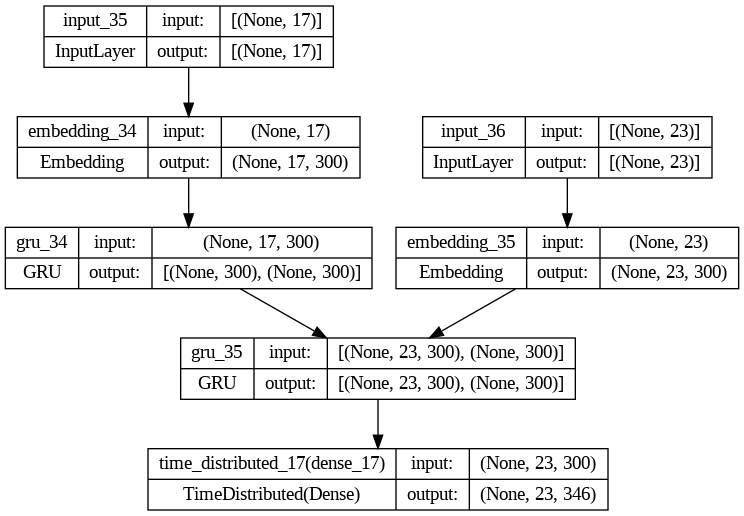

In [ ]:
latentDim = 300
UNIQUE_ENC_WORDS = len(enc_dict)
UNIQUE_DEC_WORDS = len(dec_dict)

with strategy.scope():
  encoder_input = Input(shape=(max_enc_seq_length,))
  encoder_layer = GRU(latentDim, return_state=True)
  encoder_embed = Embedding(UNIQUE_ENC_WORDS+1, latentDim, weights = [Glove(latentDim, enc_dict)], input_length=max_enc_seq_length, trainable = False)(encoder_input)
  #encoder_embed = Embedding(UNIQUE_ENC_WORDS+1, latentDim, input_length=max_enc_seq_length)(encoder_input)
  encoder_output, encoder_hidden = encoder_layer(encoder_embed)

  decoder_input = Input(shape = (max_dec_seq_length,))
  decoder_embed = Embedding(UNIQUE_DEC_WORDS+1, latentDim, weights = [Glove(latentDim, dec_dict)], input_length=max_dec_seq_length, trainable = False)(decoder_input)
  #decoder_embed = Embedding(UNIQUE_DEC_WORDS+1, latentDim, input_length=max_dec_seq_length)(decoder_input)

  decoder_layer = GRU(latentDim, return_sequences=True, return_state=True)
  decoder_output, _ = decoder_layer(decoder_embed, initial_state = encoder_hidden)

  output_layer = TimeDistributed(Dense(UNIQUE_DEC_WORDS, activation="softmax"))(decoder_output)

  model = Model([encoder_input, decoder_input], output_layer)
  model.summary()
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
decoder_target = [np.append(arr[1:],0) for arr in dec_train_pad]
decoder_target = np.array(decoder_target)

In [ ]:
print(enc_train_pad.shape, dec_train_pad.shape, decoder_target.shape)
print(enc_train_pad[137859], dec_train_pad[137859], decoder_target[137859])

(137860, 17) (137860, 23) (137860, 23)
[ 2  7 86  1 34 13 15  8  7 89  1 31 13  3  0  0  0] [ 2 86  1 22 18 19  7  9 89  1 42 95  3  0  0  0  0  0  0  0  0  0  0] [86  1 22 18 19  7  9 89  1 42 95  3  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
history = model.fit([enc_train_pad, dec_train_pad], 
                    decoder_target, 
                    batch_size = 128*strategy.num_replicas_in_sync,
                    epochs = 100,
                    validation_split = 0.3,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                    shuffle = True
                    )

Epoch 1/100
95/95 [==============================] - 20s 120ms/step - loss: 1.3077 - accuracy: 0.6900 - val_loss: nan - val_accuracy: 0.7910
Epoch 2/100
95/95 [==============================] - 4s 45ms/step - loss: 0.5336 - accuracy: 0.8247 - val_loss: nan - val_accuracy: 0.8597
Epoch 3/100
95/95 [==============================] - 4s 43ms/step - loss: 0.3465 - accuracy: 0.8864 - val_loss: nan - val_accuracy: 0.9112
Epoch 4/100
95/95 [==============================] - 4s 43ms/step - loss: 0.2137 - accuracy: 0.9323 - val_loss: nan - val_accuracy: 0.9511
Epoch 5/100
95/95 [==============================] - 4s 43ms/step - loss: 0.1230 - accuracy: 0.9633 - val_loss: nan - val_accuracy: 0.9666
Epoch 6/100
95/95 [==============================] - 4s 43ms/step - loss: 0.0762 - accuracy: 0.9786 - val_loss: nan - val_accuracy: 0.9838
Epoch 7/100
95/95 [==============================] - 5s 54ms/step - loss: 0.0485 - accuracy: 0.9879 - val_loss: nan - val_accuracy: 0.9904
Epoch 8/100
95/95 [======

In [ ]:
model.save("engToFrenchSmallDataset.h5")